In [ ]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('data/train_v2_drcat_02.csv') 
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Detecting AI_Text/data/train_v2_drcat_02.csv'

In [3]:
# Check the shape of the dataset
print("Dataset Shape:", data.shape)

# Get information about columns and data types
data.info()

# Display basic statistics
data.describe(include='all')


Dataset Shape: (44868, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


,text,label,prompt_name,source,RDizzl3_seven
count,44868,44868.000000,44868,44868,44868
unique,44868,NaN,15,17,2
top,The author of this story does not support the ...,NaN,Distance learning,persuade_corpus,False
freq,1,NaN,5554,25996,24418
mean,NaN,0.389966,NaN,NaN,NaN
std,NaN,0.487748,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display missing values
print("Missing Values:")
print(missing_values)

# Plot missing values if any exist
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=45)
    plt.title("Missing Values by Column")
    plt.show()
else:
    print("No missing values found.")


Missing Values:
Series([], dtype: int64)
No missing values found.


Class Distribution:
0    27371
1    17497
Name: label, dtype: int64


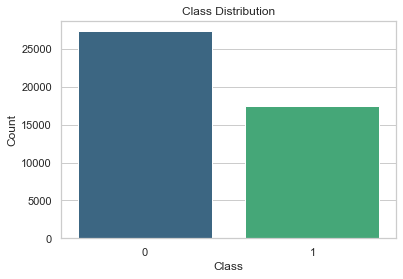

In [5]:
# Check class distribution
class_counts = data['label'].value_counts()  
# Display class counts
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


Balanced Class Distribution:
0    17497
1    17497
Name: label, dtype: int64


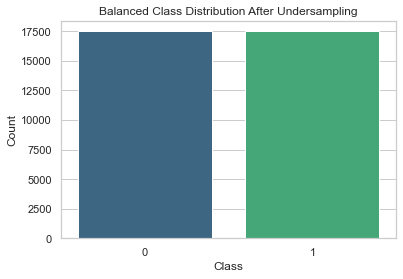

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['label'] == 0]  
minority_class = data[data['label'] == 1]

# Undersample the majority class to match the minority class
majority_undersampled = resample(majority_class, 
                                 replace=False,  # Don't replace samples
                                 n_samples=len(minority_class),  # Match minority class count
                                 random_state=42)  # Reproducibility

# Combine the undersampled majority class with the minority class
data_balanced = pd.concat([majority_undersampled, minority_class])

# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print("Balanced Class Distribution:")
print(data_balanced['label'].value_counts())

# Plot the new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data_balanced, palette='viridis')
plt.title("Balanced Class Distribution After Undersampling")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


Text-based Descriptive Statistics:
         word_count    char_count  sentence_count
count  34994.000000  34994.000000    34994.000000
mean     372.900726   2173.358119       18.896125
std      155.070428    912.573960        8.520814
min        4.000000     48.000000        0.000000
25%      273.000000   1576.000000       13.000000
50%      346.000000   2025.000000       18.000000
75%      431.000000   2547.000000       23.000000
max     1656.000000  18125.000000      216.000000


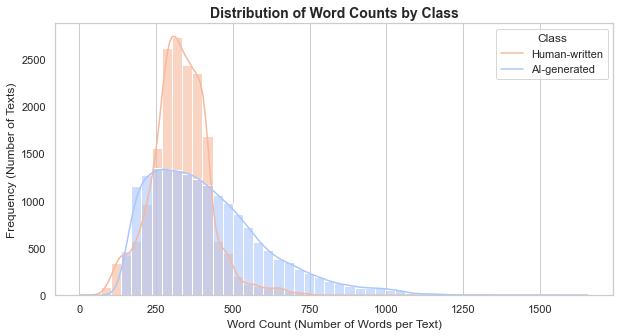

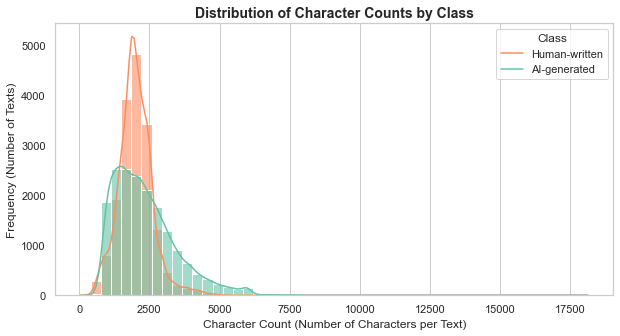

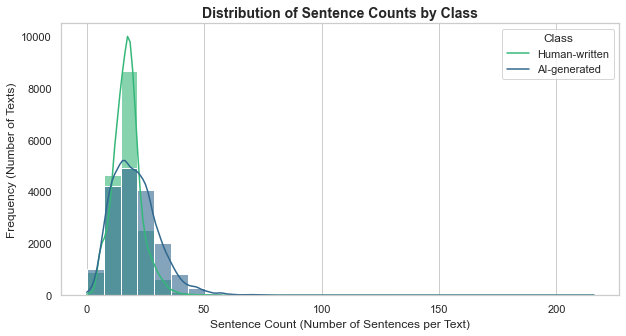

In [8]:
# Add text statistics columns
data_balanced['word_count'] = data_balanced['text'].apply(lambda x: len(str(x).split()))  
data_balanced['char_count'] = data_balanced['text'].apply(lambda x: len(str(x)))
data_balanced['sentence_count'] = data_balanced['text'].apply(lambda x: str(x).count('.'))

# Display basic statistics for these new columns
print("Text-based Descriptive Statistics:")
print(data_balanced[['word_count', 'char_count', 'sentence_count']].describe())

# Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# Plot word count distribution by class
plt.figure(figsize=(10, 5))
sns.histplot(data=data_balanced, x='word_count', bins=50, kde=True, hue='label', palette='coolwarm', alpha=0.6)
plt.title("Distribution of Word Counts by Class", fontsize=14, fontweight='bold')
plt.xlabel("Word Count (Number of Words per Text)", fontsize=12)
plt.ylabel("Frequency (Number of Texts)", fontsize=12)
plt.legend(title="Class", labels=["Human-written", "AI-generated"], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot character count distribution by class
plt.figure(figsize=(10, 5))
sns.histplot(data=data_balanced, x='char_count', bins=50, kde=True, hue='label', palette='Set2', alpha=0.6)
plt.title("Distribution of Character Counts by Class", fontsize=14, fontweight='bold')
plt.xlabel("Character Count (Number of Characters per Text)", fontsize=12)
plt.ylabel("Frequency (Number of Texts)", fontsize=12)
plt.legend(title="Class", labels=["Human-written", "AI-generated"], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot sentence count distribution by class
plt.figure(figsize=(10, 5))
sns.histplot(data=data_balanced, x='sentence_count', bins=30, kde=True, hue='label', palette='viridis', alpha=0.6)
plt.title("Distribution of Sentence Counts by Class", fontsize=14, fontweight='bold')
plt.xlabel("Sentence Count (Number of Sentences per Text)", fontsize=12)
plt.ylabel("Frequency (Number of Texts)", fontsize=12)
plt.legend(title="Class", labels=["Human-written", "AI-generated"], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Save the balanced dataset to a new CSV file
data_balanced.to_csv('balanced_dataset.csv', index=False)
